https://persim.scikit-tda.org/en/latest/notebooks/Classification%20with%20persistence%20images.html

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersImage
from persim import PersistenceImager

In [3]:
N = 200
N_per_class = int(N / 2)
N_in_class = 400

def noise(N, scale):
    return scale * np.random.random((N, 2))

def circle(N, scale, offset):
    return offset + scale * datasets.make_circles(n_samples=N, factor=0.4, noise=0.05)[0]

just_noise = [noise(N_in_class, 150) for _ in range(N_per_class)]

half = int(N_in_class / 2)
with_circle = [np.concatenate((circle(half, 50, 70), noise(half, 150)))
               for _ in range(N_per_class)]
# datas[0] = noise data = 100
# datas[1] = circle data = 100
datas = []
datas.extend(just_noise)
datas.extend(with_circle)

# Define labels
labels = np.zeros(N)
labels[N_per_class:] = 1

In [4]:
np.shape(just_noise)

(100, 400, 2)

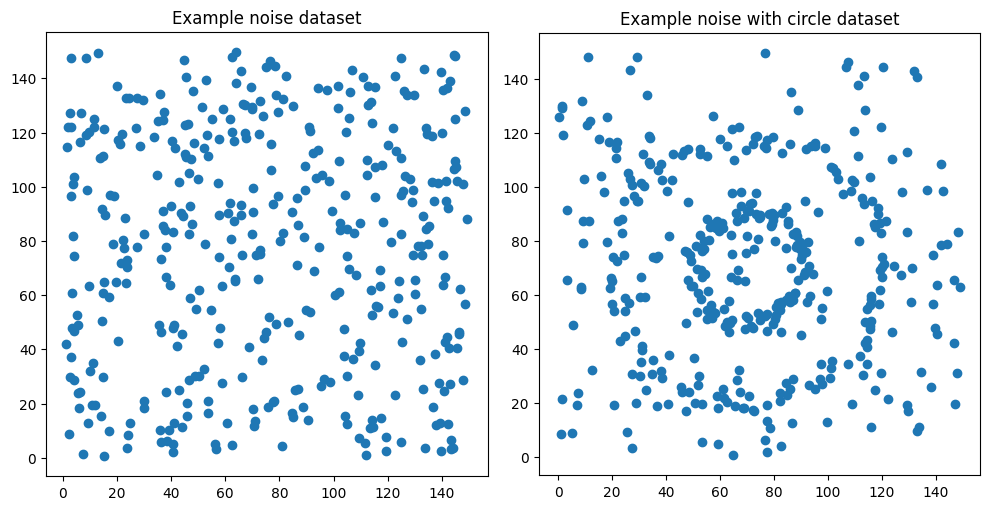

In [96]:
# Visualize the data
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10,5)

xs, ys = just_noise[0][:,0], just_noise[0][:,1]
axs[0].scatter(xs, ys)
axs[0].set_title("Example noise dataset")
axs[0].set_aspect('equal', 'box')

xs_, ys_ = with_circle[0][:,0], with_circle[0][:,1]
axs[1].scatter(xs_, ys_)
axs[1].set_title("Example noise with circle dataset")
axs[1].set_aspect('equal', 'box')

fig.tight_layout()

In [129]:
rips = Rips(maxdim=1, coeff=2)
diagrams_h0 = [rips.fit_transform(data) for data in datas]
diagrams_h1 = [rips.fit_transform(data)[1] for data in datas]

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [170]:
len(datas[0])

400

In [130]:
print(len(diagrams_h0))
print(len(diagrams_h0[0])) # 100 noise diagram & 100 with circle 
print(len(diagrams_h0[0][0])) # persistence in noise diagram
print(len(diagrams_h0[0][0][0]))

200
2
400
2


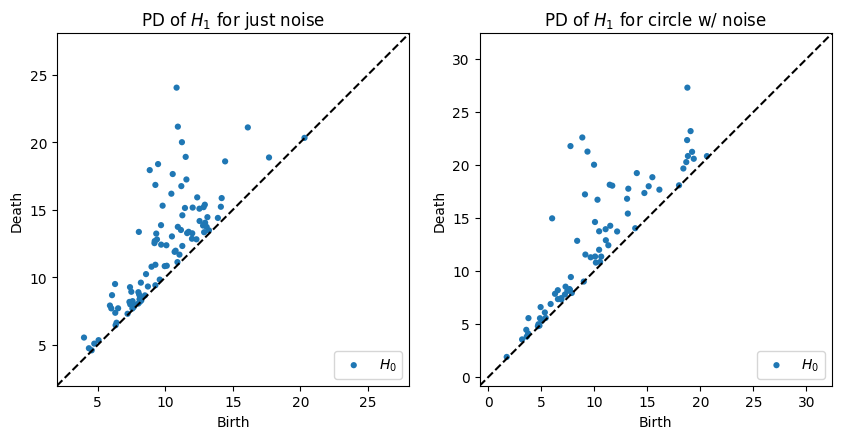

In [131]:
plt.figure(figsize=(10,5))
plt.subplot(121)

rips.plot(diagrams_h1[0], show=False)
plt.title("PD of $H_1$ for just noise")

plt.subplot(122)
rips.plot(diagrams_h1[-1], show=False)
plt.title("PD of $H_1$ for circle w/ noise")

plt.show()

In [148]:
pimgr = PersistenceImager(pixel_size=1) # persistence image range
pimgr.fit(diagrams_h1)
imgs = pimgr.transform(diagrams_h1)

pimgr

PersistenceImager(birth_range=(0.7505690455436707, 30.75056904554367), pers_range=(-0.4683351516723633, 22.531664848327637), pixel_size=1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})

In [155]:
# 200 rows of imaages, which is 30x23
print(len(imgs))
print(len(imgs[0]))
print(len(imgs[0][0]))

200
30
23


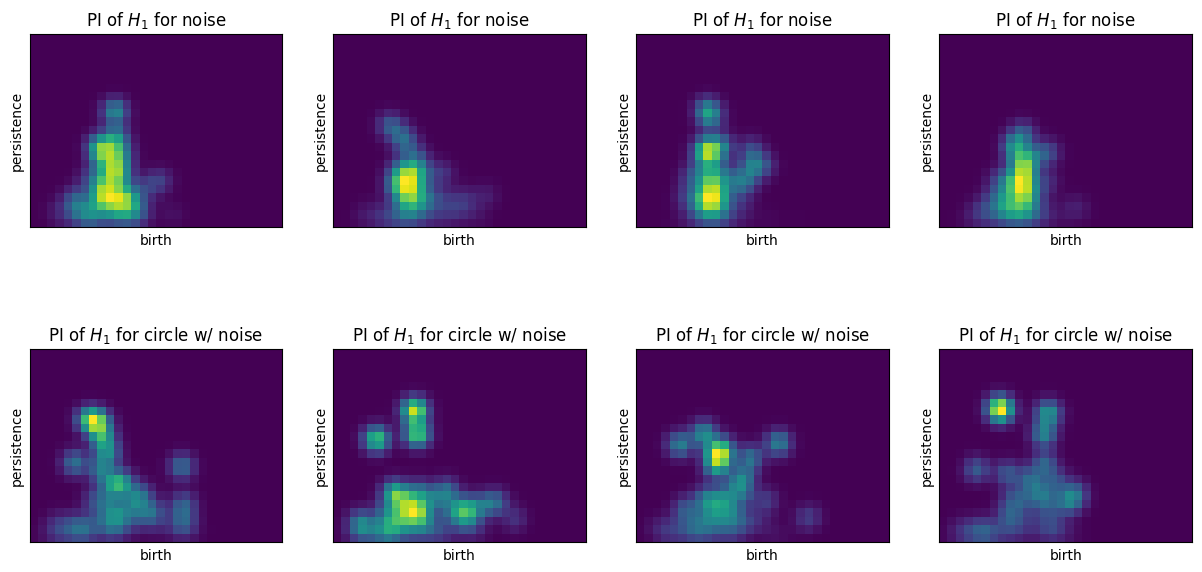

In [156]:
plt.figure(figsize=(15,7.5))

for i in range(4):
    ax = plt.subplot(240+i+1)
    pimgr.plot_image(imgs[i], ax)
    plt.title("PI of $H_1$ for noise")

for i in range(4):
    ax = plt.subplot(240+i+5)
    pimgr.plot_image(imgs[-(i+1)], ax)
    plt.title("PI of $H_1$ for circle w/ noise")

In [149]:
imgs_array = np.array([img.flatten() for img in imgs])

print(len(imgs_array))
print(len(imgs_array[0]))

200
690


In [60]:
X_train, X_test, y_train, y_test = train_test_split(imgs_array, labels, test_size=0.40, random_state=42)

In [64]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

1.0

<Axes: xlabel='birth', ylabel='persistence'>

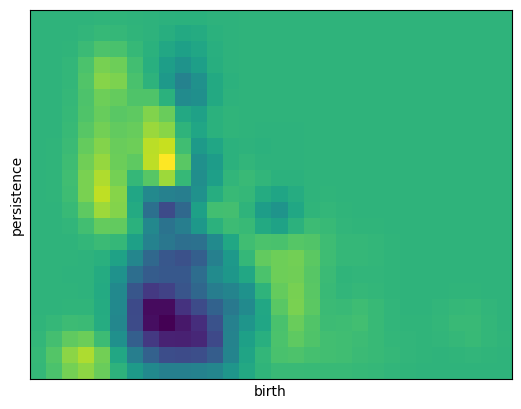

In [65]:
inverse_image = np.copy(lr.coef_).reshape(pimgr.resolution)
pimgr.plot_image(inverse_image)